# Introduction

This study provides a comprehensive analysis of the relationship between fatal road accidents and death rates in North Rhine-Westphalia. It delves into the factors contributing to these accidents and their impact on fatalities in the region. Focusing on North Rhine-Westphalia, the research aims to uncover patterns and potential causal links between traffic incidents and deaths. The goal is to offer insights into the effectiveness of traffic safety measures, understand accident and mortality trends, and propose strategies to reduce the occurrence and severity of road accidents. Ultimately, this study aims to enhance traffic safety and save lives in North Rhine-Westphalia by informing practical and effective safety intervention

## DataSources

Here is a short listing of datasources

Datasource1 : Number of accidents by location - Country - Month

Link : https://www.govdata.de/ckan/dataset/anzahl-der-unfalle-nach-ortslage-land-monat.rdf

Datasource2 : Deaths by sex and selected causes of death (84) - independent cities and districts - year

Link : https://www.govdata.de/ckan/dataset/gestorbene-nach-geschlecht-und-ausgewahltentodesursachen-84-kreisfreie-stadte-und-kreise-jahr.rdf

## Data Pipeline

Data Loading: Both the datasets were exported by Jayvee.

Data Cleaning: The datasets were cleaned by Javyee itself. Intially removed all null or empty row while extracting SQLITE file. 

Data Transformation: After exporting SQLITE file the transform data accordingly in Jupyter Notebook file.



## Results 





In [1]:
import pandas as pd
from sqlalchemy import create_engine
import os
import re
import sqlite3
import opendatasets as od
import ipdb
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_6528\4110527353.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Dataset Loading


In [2]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
os.chdir('..')
Sqlfilepath1 = os.path.join(os.getcwd(), "data", "accidentdata.sqlite")
conn = sqlite3.connect(Sqlfilepath1)
# print(Sqlfilepath1)

# Test case: Selecting the query using PANDAS function to check whether the data is stored in the database.
query = f"SELECT * FROM accidentdata;"
accident_df = pd.read_sql_query(query, conn)
# print(accident_df)

Sqlfilepath2 = os.path.join(os.getcwd(), "data", "deathdata.sqlite")
conn = sqlite3.connect(Sqlfilepath2)
# print(Sqlfilepath2)

# Test case: Selecting the query using PANDAS function to check whether the data is stored in the database.
query = f"SELECT * FROM deathdata;"
death_df = pd.read_sql_query(query, conn)
# print(death_df)


# Close the connection
conn.close()

In [3]:
print(accident_df.head(5))
print(death_df.head(5))


   year    Month  Insgesamt  innerorts  außerorts (ohne Autobahnen)  \
0  2023   Januar       5535       3980                         1090   
1  2023  Februar       5041       3645                          998   
2  2023     März       5630       4080                         1112   
3  2023    April       5300       3823                         1034   
4  2023      Mai       5545       3998                         1160   

   auf Autobahnen  
0             465  
1             398  
2             438  
3             443  
4             387  
   year  numberid                 city     citycode  \
0  1998         5  Nordrhein-Westfalen      A00-U49   
1  1998         5  Nordrhein-Westfalen      A00-B99   
2  1998         5  Nordrhein-Westfalen  A15-A19,B90   
3  1998         5  Nordrhein-Westfalen          A39   
4  1998         5  Nordrhein-Westfalen      B15-B19   

                                      accidentType   Total   Male  Female  
0                                        Insge

# Data Cleaning

In [4]:
# Filter only Month, Year, and Total accident records
columns_to_keep = ['Month', 'year','Insgesamt']
New_Accident_df = accident_df[columns_to_keep]
filtered_df = New_Accident_df[New_Accident_df['Month'] == 'Insgesamt']
# print(filtered_df)


### Accident Dataset from 1995 to 2022 for Nordrhein-Westfalen (Dataset 1)

C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_6528\2800547991.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(x='year', y='Insgesamt', data=filtered_df, estimator=sum, palette='plasma', ci=None)
C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_6528\2800547991.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='year', y='Insgesamt', data=filtered_df, estimator=sum, palette='plasma', ci=None)
c:\Users\Prathamesh Shankar\Desktop\Prathamesh\MADE\made-template-ws2324\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data

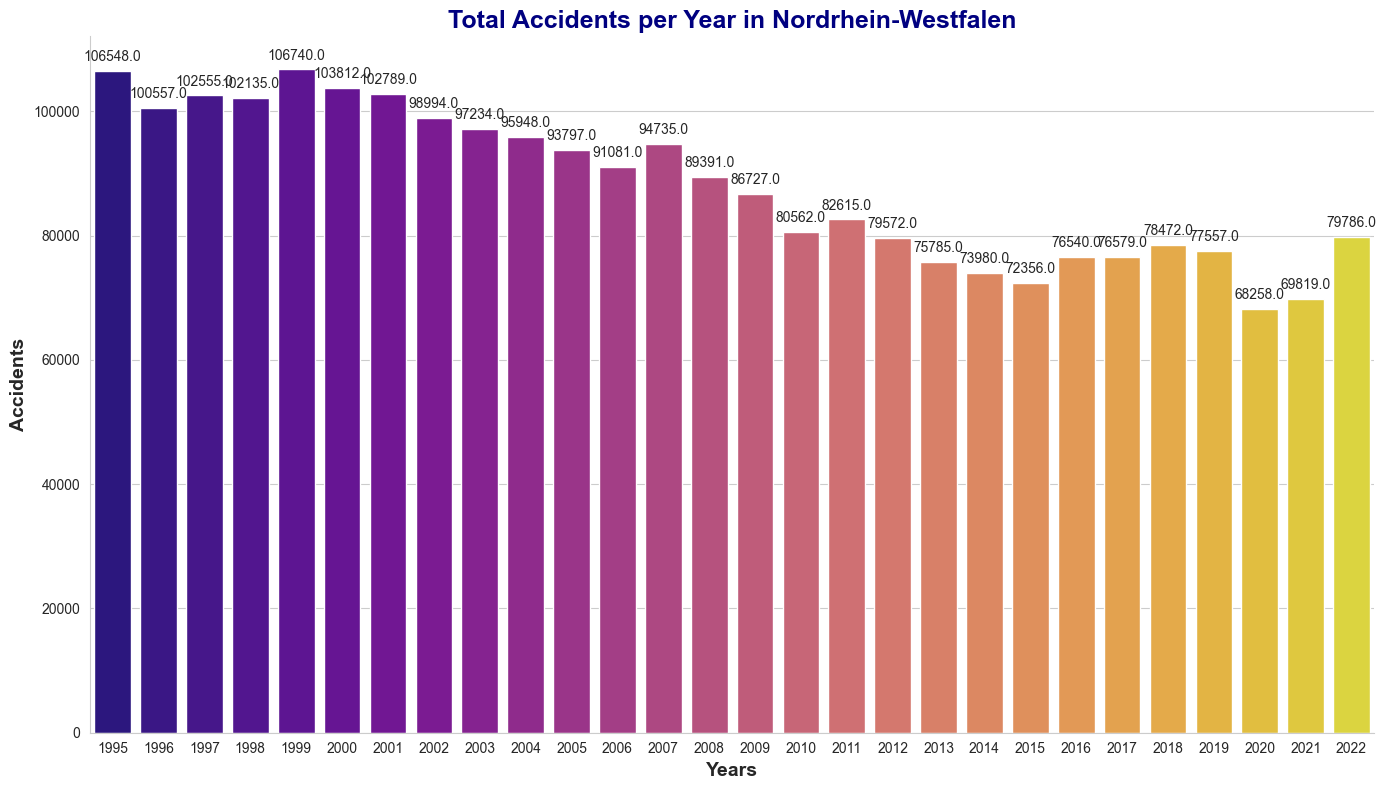

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'Insgesamt' is a numeric type if it's not
# filtered_df['Insgesamt'] = pd.to_numeric(filtered_df['Insgesamt'], errors='coerce')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Sum of 'Insgesamt' per year
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='year', y='Insgesamt', data=filtered_df, estimator=sum, palette='plasma', ci=None)

plt.title('Total Accidents per Year in Nordrhein-Westfalen', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Years', fontsize=14, fontweight='bold')
plt.ylabel('Accidents', fontsize=14, fontweight='bold')

# Adding the data labels on the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 10), 
                      textcoords = 'offset points')

sns.despine()  # Remove the top and right spines from plot
plt.tight_layout()
plt.show()


### Number of Death from 1998 to 2022 for entire Germany (Dataset 2)

In [6]:
import numpy as np
# Filter only Year, City, and Total death records in Nordrhein-Westfalen city
dtype_dict = {
    'Total': 'int',
    'Female': 'int',
    'Male': 'int'
    # add more columns as needed
}
columns_to_keep_death = ['year', 'city','accidentType','Total','Female','Male']
New_death_df = death_df[columns_to_keep_death]
New_death_df = New_death_df.replace('-', np.nan)
New_death_df.dropna(subset=['Total','Female','Male'], inplace=True)
#New_death_df = New_death_df[New_death_df['Female'] == '-']
# print(New_death_df)
New_death_df.astype(dtype_dict)
# New_death_df = New_death_df.fillna('')

# Alternatively, to drop the row in place without reassigning the DataFrame (modifying the original DataFrame)
filtered_death_df = New_death_df[New_death_df['city'] == 'Nordrhein-Westfalen']
# print(filtered_death_AccidentType.head(5))
filtered_death_AccidentType = filtered_death_df[filtered_death_df['accidentType'] != 'Insgesamt']


filtered_death_df_Total = filtered_death_df[filtered_death_df['accidentType'] == 'Insgesamt']

filtered_death_df_Total = filtered_death_df_Total.sort_values(by='year', ascending=False)

filtered_death_df_Total = filtered_death_df_Total.astype(dtype_dict)


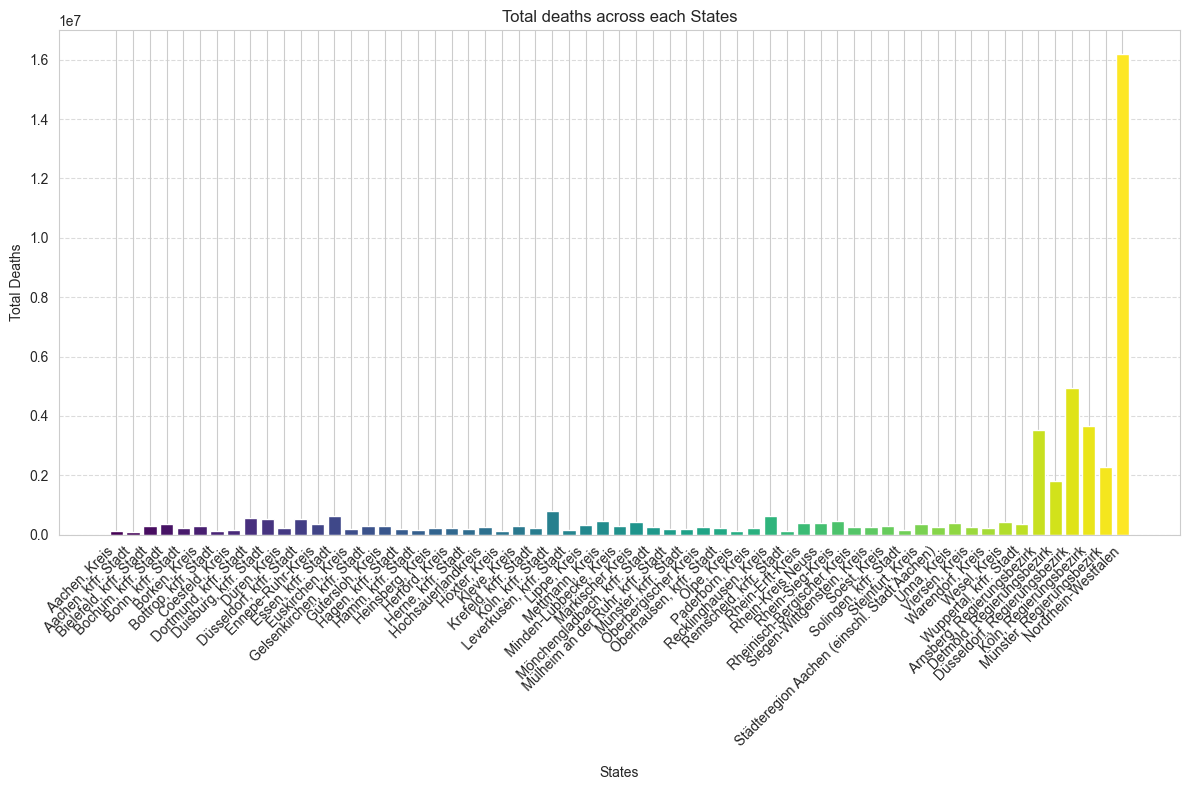

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming New_death_df is your DataFrame and is already loaded

# Data Aggregation: Sum the 'Total' column for each accidentType
all_states_death = New_death_df.groupby('city')['Total'].sum()

plt.figure(figsize=(12, 8))  # Adjust the size of the figure as needed

# Creating the bar chart
plt.bar(all_states_death.index, all_states_death, color=plt.cm.viridis(np.linspace(0, 1, len(all_states_death.index))))

# Adding a title
plt.title('Total deaths across each States')

# Adding labels for x and y axes
plt.xlabel('States')
plt.ylabel('Total Deaths')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add grid to the y-axis for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


### Total Death Graph increase over the years in Nordrhein-Westfalen

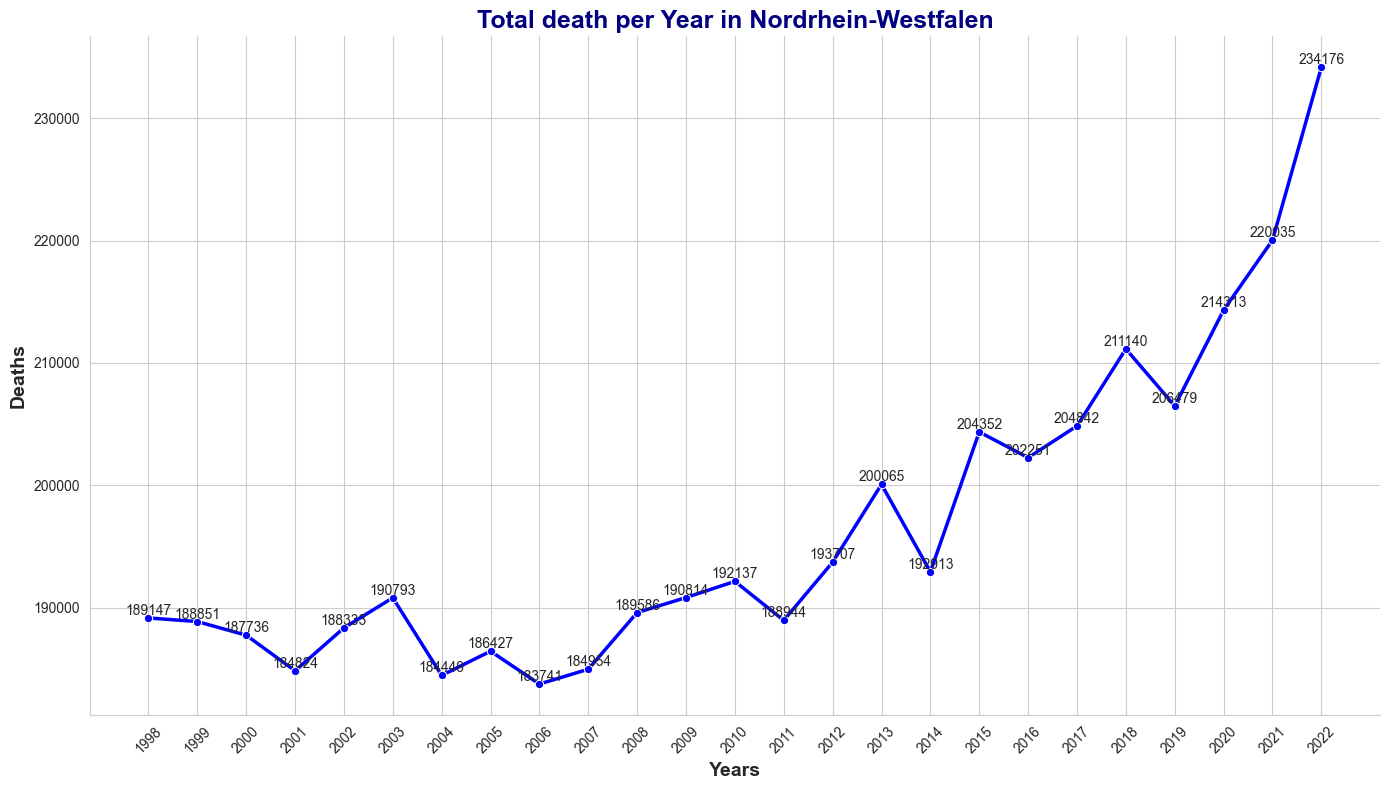

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plotting
plt.figure(figsize=(14, 8))

# Using seaborn lineplot to create the line graph
line_plot = sns.lineplot(x='year', y='Total', data=filtered_death_df_Total, marker='o', color='blue', linewidth=2.5)

plt.title('Total death per Year in Nordrhein-Westfalen', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Years', fontsize=14, fontweight='bold')
plt.ylabel('Deaths', fontsize=14, fontweight='bold')

# Ensure every year is displayed on the x-axis
plt.xticks(filtered_death_df_Total['year'].unique())

# Rotate the x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Adding the data labels on the line plot
for x, y in zip(filtered_death_df_Total['year'], filtered_death_df_Total['Total']):
    plt.text(x, y, f'{y}', ha='center', va='bottom')

sns.despine()  # Remove the top and right spines from plot
plt.grid(True)  # Add grid for better readability
plt.tight_layout()
plt.show()


### Death Ratio of Male and Female in Nordrhein-Westfalen

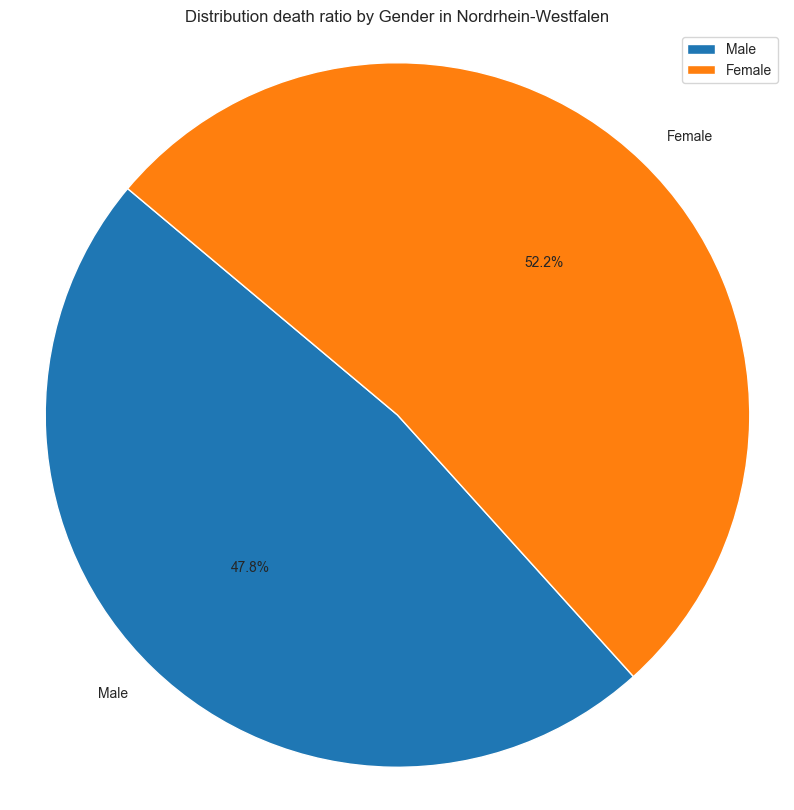

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and is already loaded
# Summing the 'Male' and 'Female' columns
gender_totals = filtered_death_df_Total[['Male', 'Female']].sum()

# Plotting
plt.figure(figsize=(10, 10))  # Adjust the size of the figure as needed

# Creating the pie chart
plt.pie(gender_totals, labels=gender_totals.index, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Adding a title
plt.title('Distribution death ratio by Gender in Nordrhein-Westfalen')

# Show the plot
plt.legend()
plt.show()


### Total deaths of different cause

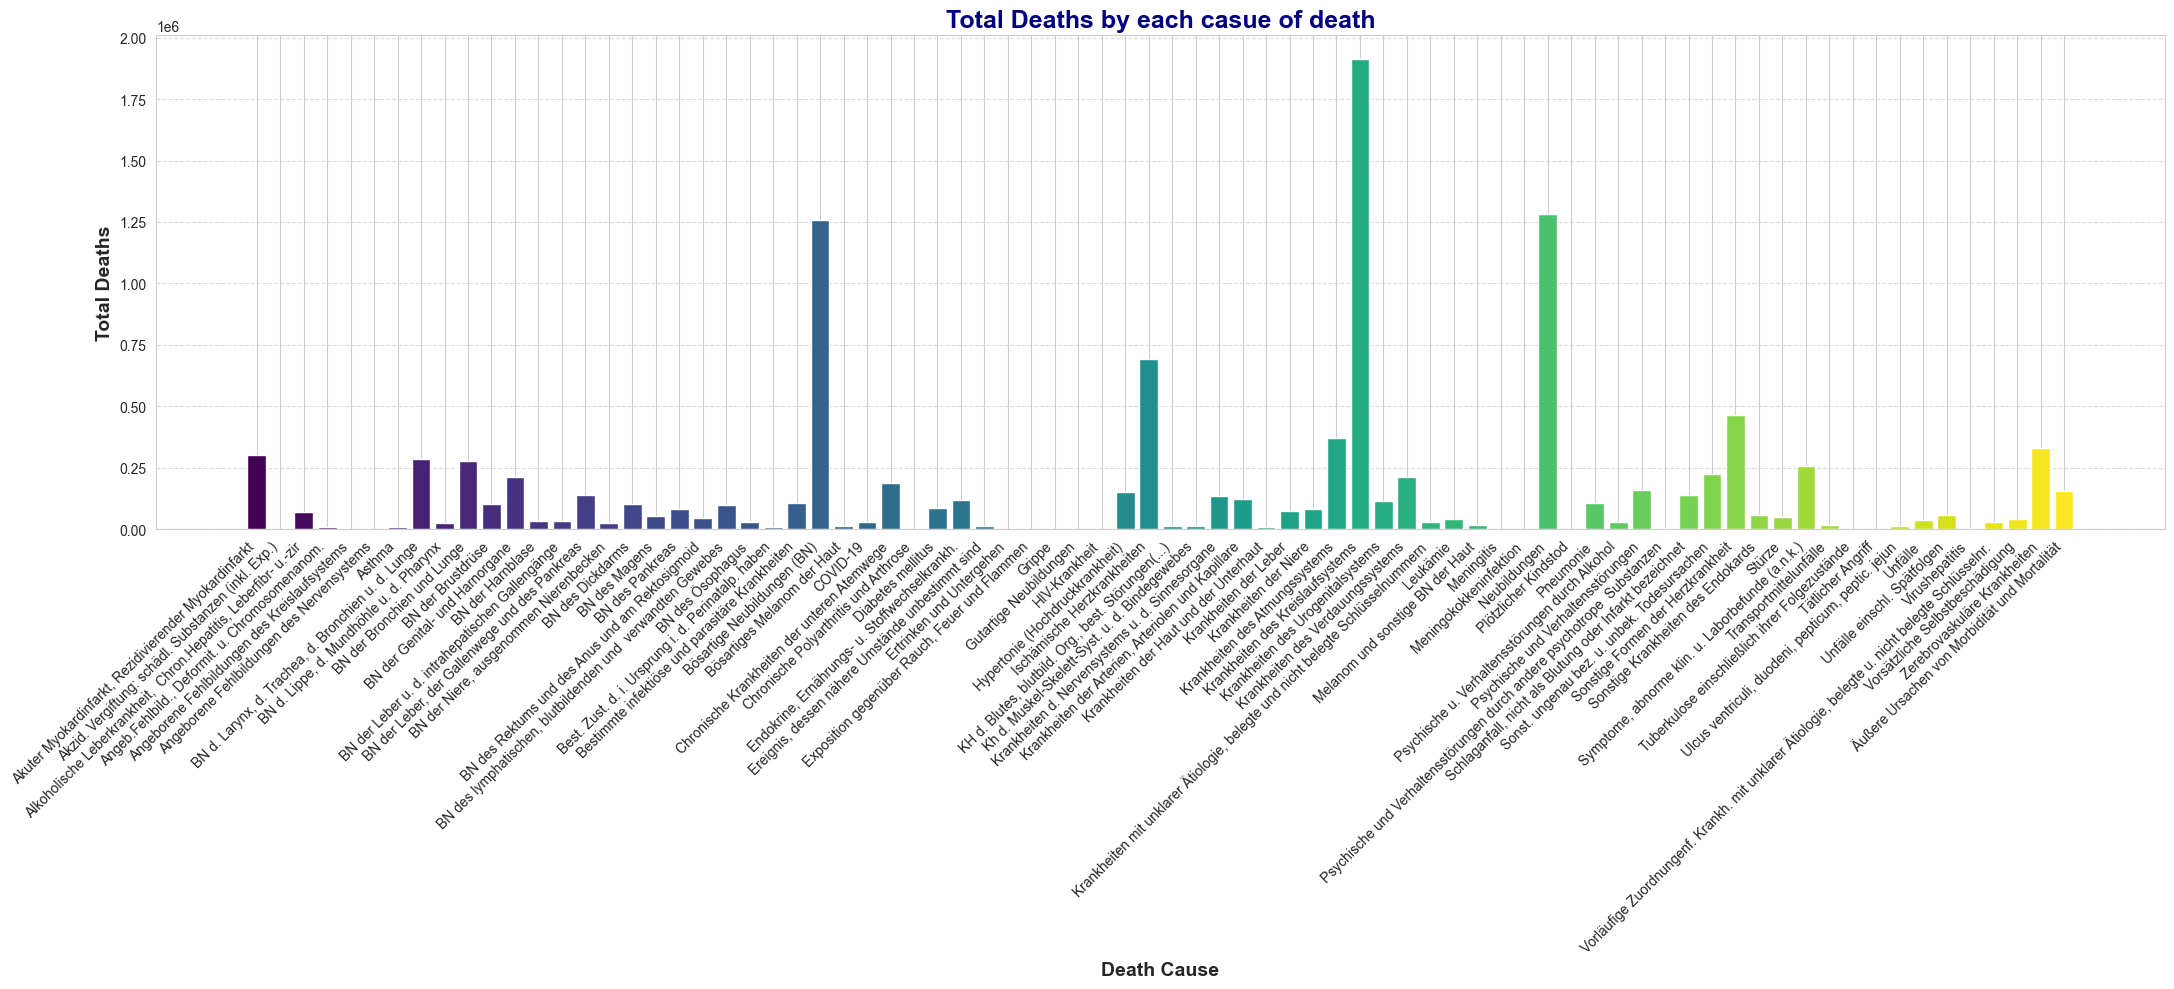

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming New_death_df is your DataFrame and is already loaded

# Data Aggregation: Sum the 'Total' column for each accidentType
yearly_totals = filtered_death_AccidentType.groupby('accidentType')['Total'].sum()

# Create a color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(yearly_totals.index)))

plt.figure(figsize=(22, 10))  # Adjust the size of the figure as needed

# Creating the bar chart
plt.bar(yearly_totals.index, yearly_totals, color=colors)

# Adding titles and labels
plt.title('Total Deaths by each casue of death', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Death Cause', fontsize=14, fontweight='bold')
plt.ylabel('Total Deaths', fontsize=14, fontweight='bold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid to the y-axis for better readability

plt.tight_layout()  # Adjust the layout
plt.show()


### Total Numbers of deaths happened Due to Road accidents in Nordrhein-Westfalen
#### For the analysis choosed Read accidents deaths

In [11]:
import pandas as pd

# Assuming filtered_death_df is your DataFrame

# Define the list of accident types you are interested in
# accident_types_of_interest = ['Unfälle einschl. Spätfolgen', 'Unfälle', 'Transportmittelunfälle']  # Replace 'Type2', 'Type3', etc., with your actual types
accident_types_of_interest = ['Transportmittelunfälle'] 
# Use the isin method to filter rows where 'accidentType' matches any of the types in your list
filtered_death_df_Total_Accident = filtered_death_df[filtered_death_df['accidentType'].isin(accident_types_of_interest)]
# print(filtered_death_df_Total_Accident.head(5))
# Now, filtered_death_df_Total contains rows where 'accidentType' is either 'Insgesamt', 'Type2', or 'Type3'


C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_6528\511196550.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(x='year', y='Total', data=filtered_death_df_Total_Accident, estimator=sum, palette='plasma', ci=None)
C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_6528\511196550.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='year', y='Total', data=filtered_death_df_Total_Accident, estimator=sum, palette='plasma', ci=None)
c:\Users\Prathamesh Shankar\Desktop\Prathamesh\MADE\made-template-ws2324\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warni

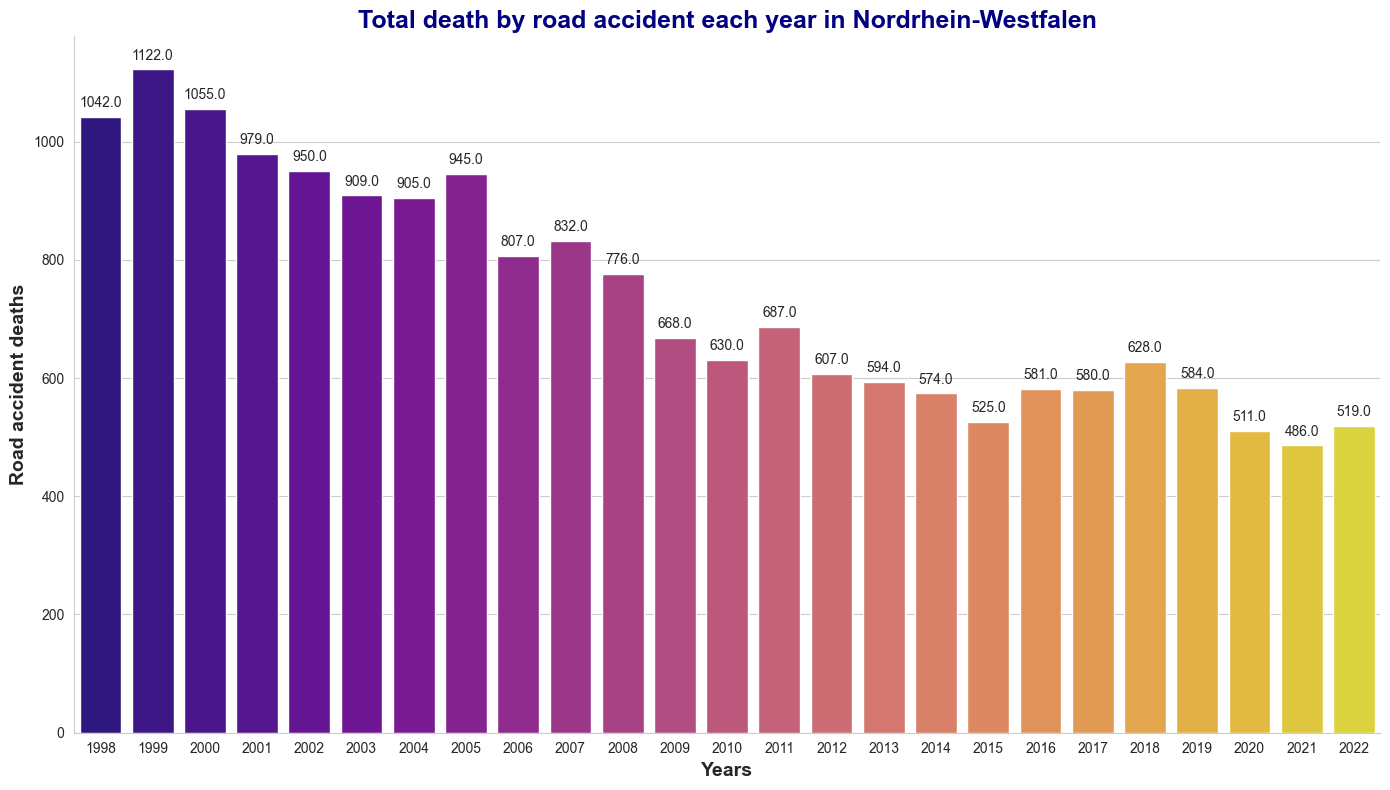

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'Insgesamt' is a numeric type if it's not
# filtered_df['Insgesamt'] = pd.to_numeric(filtered_df['Insgesamt'], errors='coerce')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Sum of 'Insgesamt' per year
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='year', y='Total', data=filtered_death_df_Total_Accident, estimator=sum, palette='plasma', ci=None)

plt.title('Total death by road accident each year in Nordrhein-Westfalen', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Years', fontsize=14, fontweight='bold')
plt.ylabel('Road accident deaths', fontsize=14, fontweight='bold')

# Adding the data labels on the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 10), 
                      textcoords = 'offset points')

sns.despine()  # Remove the top and right spines from plot
plt.tight_layout()
plt.show()

### Number of Male and Female death happend due to Road accident on each year.

C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_6528\3613155594.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(x='year', y='Deaths', hue='Gender', data=melted_df, estimator=sum, palette='plasma', ci=None)
c:\Users\Prathamesh Shankar\Desktop\Prathamesh\MADE\made-template-ws2324\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Prathamesh Shankar\Desktop\Prathamesh\MADE\made-template-ws2324\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.

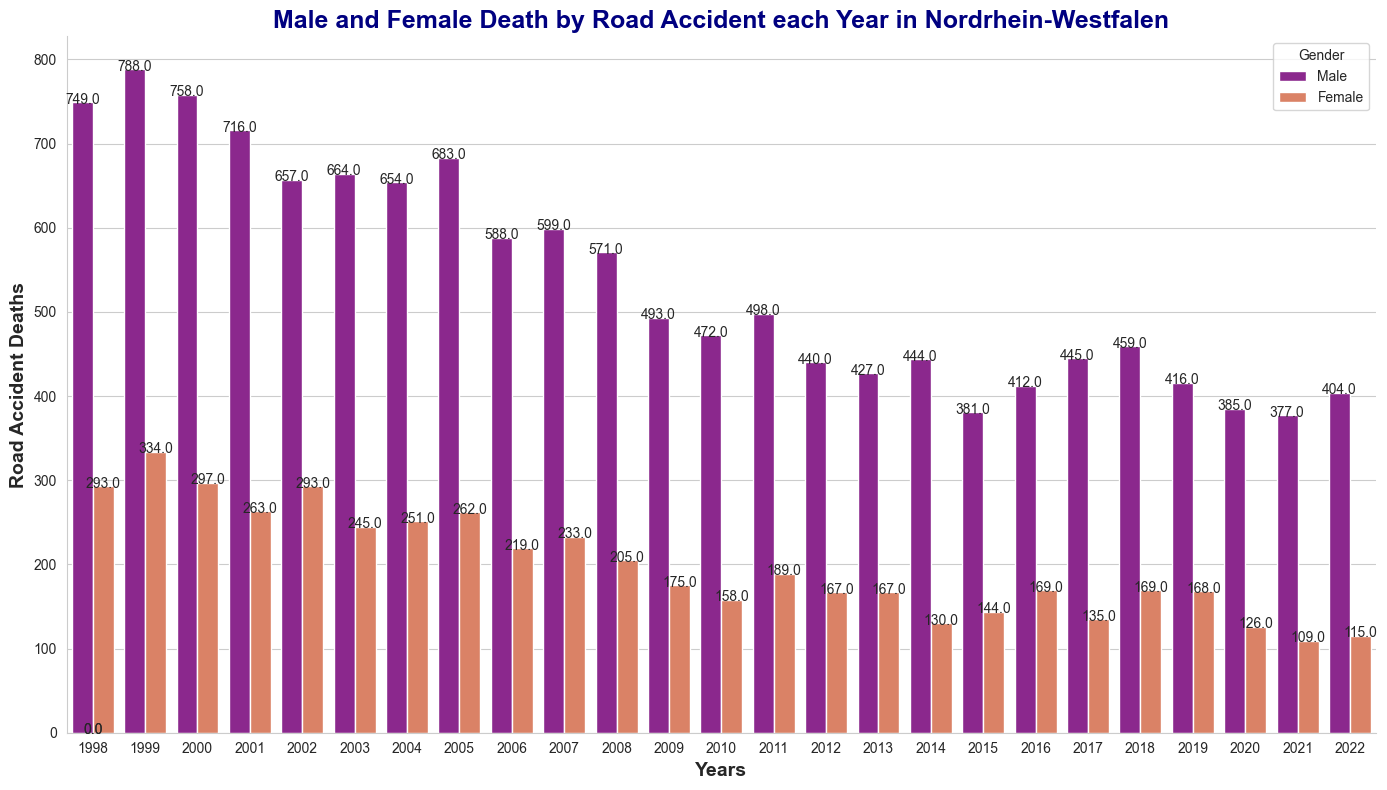

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming filtered_death_df_Total_Accident is your DataFrame and is already loaded

# Ensure 'Male' and 'Female' are numeric types if they're not
# filtered_death_df_Total_Accident['Male'] = pd.to_numeric(filtered_death_df_Total_Accident['Male'], errors='coerce')
# filtered_death_df_Total_Accident['Female'] = pd.to_numeric(filtered_death_df_Total_Accident['Female'], errors='coerce')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Reshape the DataFrame to have 'Male' and 'Female' in the same column
melted_df = pd.melt(filtered_death_df_Total_Accident, id_vars=['year'], value_vars=['Male', 'Female'], var_name='Gender', value_name='Deaths')

# Plotting
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='year', y='Deaths', hue='Gender', data=melted_df, estimator=sum, palette='plasma', ci=None)

plt.title('Male and Female Death by Road Accident each Year in Nordrhein-Westfalen', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Years', fontsize=14, fontweight='bold')
plt.ylabel('Road Accident Deaths', fontsize=14, fontweight='bold')

# Adding the data labels on the bars
for p in bar_plot.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 3, f'{height:.1f}', ha='center', va='center')

sns.despine()  # Remove the top and right spines from plot
plt.tight_layout()
plt.show()


## Combining 2 different dataset for detail analysis
#### Load both the dataset based on year to see actual numbers of accidents and actual deaths cause of road accidents in Nordrhein-Westfalen State.

In [14]:
# Merging DataFrames based on a common column
merged_df = pd.merge(filtered_df, filtered_death_df_Total_Accident, on='year', how='inner')

print(merged_df.head(5))

# Grouping and aggregating data
# grouped_data = merged_df.groupby('grouping_column')['aggregating_column'].sum()


       Month  year  Insgesamt                 city            accidentType  \
0  Insgesamt  2022      79786  Nordrhein-Westfalen  Transportmittelunfälle   
1  Insgesamt  2021      69819  Nordrhein-Westfalen  Transportmittelunfälle   
2  Insgesamt  2020      68258  Nordrhein-Westfalen  Transportmittelunfälle   
3  Insgesamt  2019      77557  Nordrhein-Westfalen  Transportmittelunfälle   
4  Insgesamt  2018      78472  Nordrhein-Westfalen  Transportmittelunfälle   

   Total  Female  Male  
0    519     115   404  
1    486     109   377  
2    511     126   385  
3    584     168   416  
4    628     169   459  


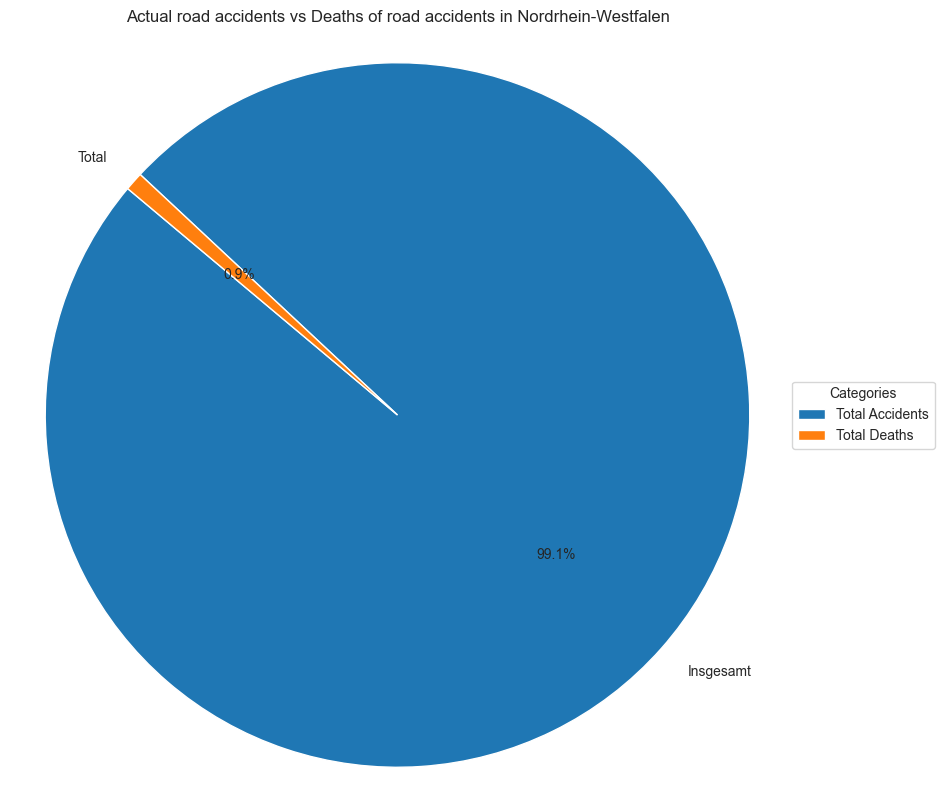

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming merged_df is your DataFrame and is already loaded
# Summing the 'Insgesamt' and 'Total' columns
actual_Accidents_vs_deaths = merged_df[['Insgesamt', 'Total']].sum()

# Plotting
plt.figure(figsize=(10, 10))  # Adjust the size of the figure as needed

# Creating the pie chart
plt.pie(actual_Accidents_vs_deaths, labels=actual_Accidents_vs_deaths.index, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Adding a title
plt.title('Actual road accidents vs Deaths of road accidents in Nordrhein-Westfalen')

# Show the plot with a custom legend
custom_legend_names = ['Total Accidents', 'Total Deaths']  # Change these names to your preference
plt.legend(custom_legend_names, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()


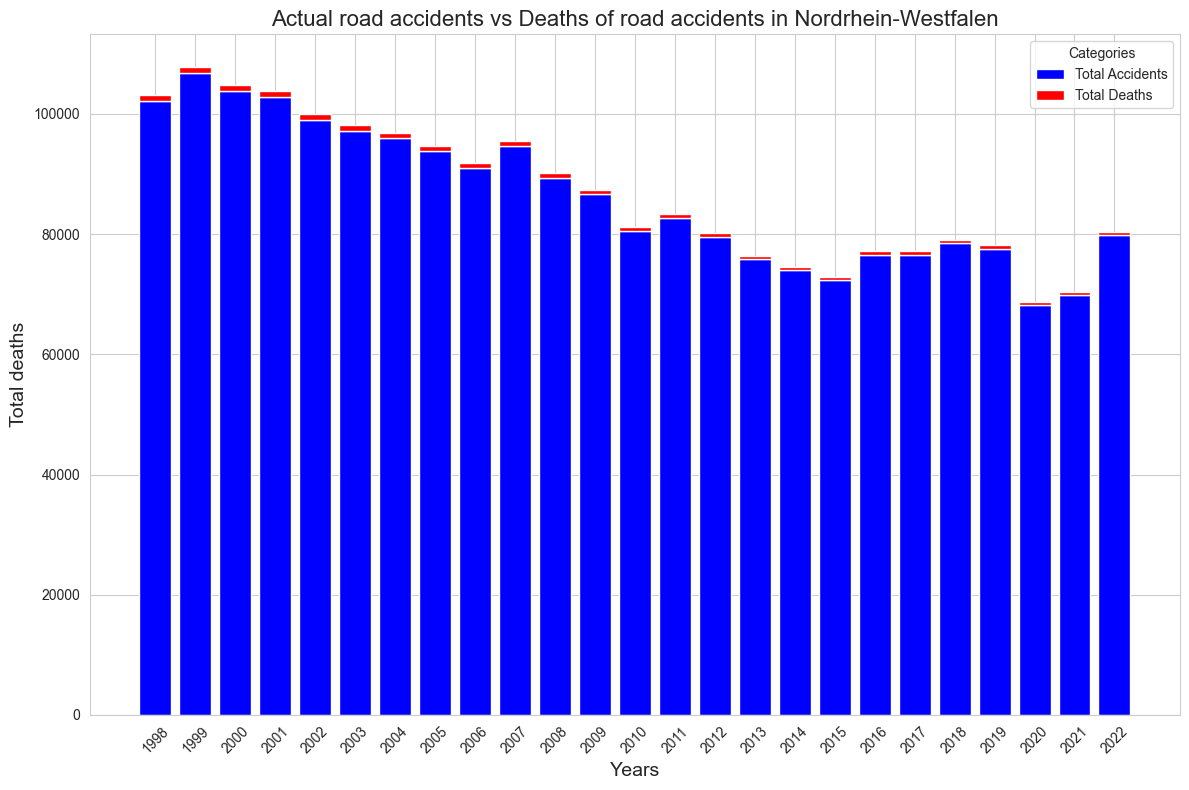

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming merged_df is your DataFrame and is already loaded
# Also assuming there is a 'year' column in merged_df

# Group and sum 'Insgesamt' and 'Total' for each year or similar category
grouped_data = merged_df.groupby('year')[['Total', 'Insgesamt']].sum()

# Plotting
plt.figure(figsize=(12, 8))

# Creating the stacked bar chart
# Plotting 'Insgesamt' first
plt.bar(grouped_data.index, grouped_data['Insgesamt'], label='Total Accidents', color='blue')

# Stacking 'Total' on top of 'Insgesamt'
plt.bar(grouped_data.index, grouped_data['Total'], label='Total Deaths', bottom=grouped_data['Insgesamt'], color='red')

# Adding titles and labels
plt.title('Actual road accidents vs Deaths of road accidents in Nordrhein-Westfalen', fontsize=16)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Total deaths', fontsize=14)

# Ensure every year is displayed on the x-axis and rotate labels for better readability
plt.xticks(ticks=grouped_data.index, labels=grouped_data.index, rotation=45)

# Add grid for better readability
plt.grid(True, axis='y')

# Add a legend
plt.legend(title="Categories")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


## Conclusion


The study conducts a detailed examination of the relationship between fatal road accidents and death rates in North Rhine-Westphalia. It investigates contributing factors to these accidents and their impact on fatalities. By identifying patterns and potential causal links, the research evaluates the effectiveness of traffic safety measures and trends in accidents and mortality. The ultimate objective is to propose strategies to reduce road accidents and their severity, thereby enhancing traffic safety and saving lives in North Rhine-Westphalia through informed and practical safety interventions.